In [126]:
import requests
from bs4 import BeautifulSoup
import bs4
from IPython.display import Image
import matplotlib.pyplot as plt

In [68]:
def add_pic(pic_name ):
    return (Image(filename='/Users/paxton615/Github_Personal/Notes/Notes/pics/uni_ranking/'+pic_name))

In [25]:
! ls /Users/paxton615/Github_Personal/Notes/Notes/pics/

bs4                           requests
html                          sklearn_algorithm_cheat_sheet
linear_algebra                uni_ranking
normal_distribution


### 爬取前需要检查

1.需要确认被提取信息是否存在于html脚本中中，因为有些内容是写在Javascript中的，这种情况下，被提取信息是动态生成的,requests无法提取。

2.是否支持Robost协议http://www.zuihaodaxue.cn/zuihaodaxuepaiming2019.html/robots.txt

### 爬虫设计思路

1. 从网络上获取大学排名内容

2. 提取网页内容中信息到合适的数据结构

3. 利用数据结构展示并输出结果

### 程序的结构设计

先定义3个基本函数

1. 从网络上获取大学排名网页内容 getHTMLText()

2. 提取网页内容中信息到合适的数据结构 fillUnivList()

3. 利用数据结构展示并输出结果 printUnivList()

4. 再定义一个主函数 def main()统筹运行

1.从网络上获取大学排名网页内容 getHTMLText()

In [113]:
def getHTMLText(url): # 获取url信息，输出html页面给下一个函数，requests的工作
    try:
        r = requests.get(url, timeout = 30) # 传入网址,30s相应时间
        r.raise_for_status()  # 回馈相应情况
        r.encoding = r.apparent_encoding  # 设定解码准则
        return r.text  # 返回html文本
    except:
        return ''  # 否则返回空str

In [26]:
# 测试成功
# r = requests.get('http://www.zuihaodaxue.cn/zuihaodaxuepaiming2019.html')
# r.status_code

200

2.提取网页内容中信息到合适的数据结构 fillUnivList()

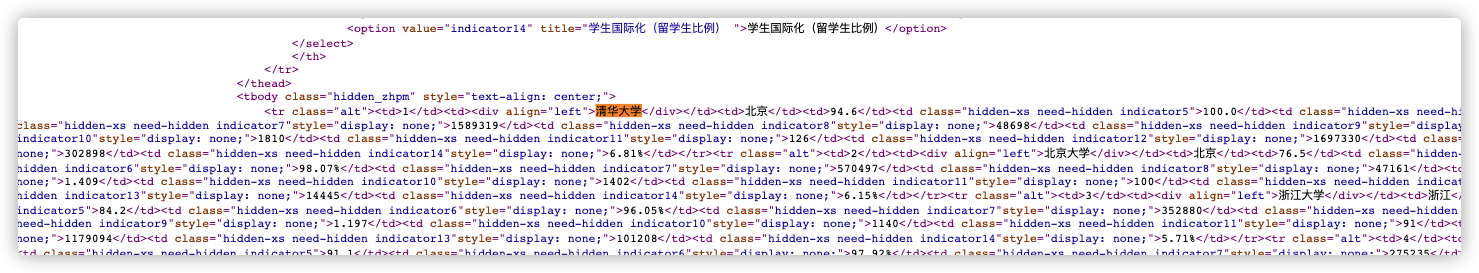

In [118]:
add_pic('html2.png')

In [114]:
def fillUnivList(ulist, html): #将html页面放到一个list中，bs4的工作,核心工作
    #pass    # pass不做任何操作
    soup = BeautifulSoup(r.text , 'html.parser')
    ulist = []
    for tr in soup.find('tbody').children:  # 关系大到小：tbody > tr > td 
        #print(tr) #测试成功，可以找到tr信息，每一个tr就是一所大学所对应的信息
        #课程内容：实际标签构建中，它的儿子标签中可能出现str，但是这里的信息都是封装在tr标签中，它是标签类型，
        #接上，因此这里我们需要过滤掉非标签类型的其他信息，需用isinstance()做个判断

        if isinstance(tr, bs4.element.Tag):  # 检测tr标签的类型，如果其不属于bs4.element.Tag类型，将被过滤掉
        # 接上，做这个判断需要import 纯bs4库，添加 import bs4

            tds = tr('td') # 如上一步判定成功，则需要继续find_all查询tr中的td标签，储存在tds中
            #print(tds) #测试成功，可以找到td信息

            ulist.append([tds[0].string, tds[1].string, tds[2].string, tds[3].string]) #测试成功，549所学校信息

            # 网页显示只能展示5组信息，但爬虫可以将隐藏信息全部抓取下来
            
    return (ulist)

In [112]:
# 测试成功
# soup = BeautifulSoup(r.text , 'html.parser')
# ulist = []
# for tr in soup.find('tbody').children:  # 关系大到小：tbody > tr > td 
#     #print(tr) #测试成功，可以找到tr信息，每一个tr就是一所大学所对应的信息
#     #课程内容：实际标签构建中，它的儿子标签中可能出现str，但是这里的信息都是封装在tr标签中，它是标签类型，
#     #接上，因此这里我们需要过滤掉非标签类型的其他信息，需用isinstance()做个判断
    
#     if isinstance(tr, bs4.element.Tag):  # 检测tr标签的类型，如果其不属于bs4.element.Tag类型，将被过滤掉
#     # 接上，做这个判断需要import 纯bs4库，添加 import bs4
    
#         tds = tr('td') # 如上部成功，则需要继续查询td标签
#         #print(tds) #测试成功，可以找到td信息
        
#         ulist.append([tds[0].string, tds[1].string, tds[2].string, tds[3].string , tds[4].string]) #测试成功，549所学校信息
    
# print(ulist)
        

3.利用数据结构展示并输出结果 printUnivList()

In [139]:
def printUnivList(ulist, num): # 将list中的信息打印出来，num表示，进行格式化输出.format()
    # 你想把多少所学校的内容打印出来
    print('{:^10}\t{:^10}\t{:^10}\t{:^10}'.format('排名','校名', '省份','总分')) #表头
    
    for i in range(num):
        u=ulist[i]  # 从ulist中读取一定数量的信息
        print('{:^10}\t{:^10}\t{:^10}\t{:^10}'.format(u[0],u[1],u[2],u[3])) 
        

In [137]:
# 课程内容：通用问题，中文输出对齐问题解决方案
# def printUnivList(ulist, num): # 
    
#     tplt = '{0:^10}\t{1:{4}^10}\t{2:^10}\t{3:^10}' #{4}多出来的这个表示，使用format
    
#     print(tplt.format('排名','校名', '省份','总分', chr(12288))) # chr(12288)中文空格代码
    
#     for i in range(num):
#         u=ulist[i]  # 从ulist中读取一定数量的信息
#         print(tplt.format(u[0],u[1],u[2],u[3], chr(12288))) 
        

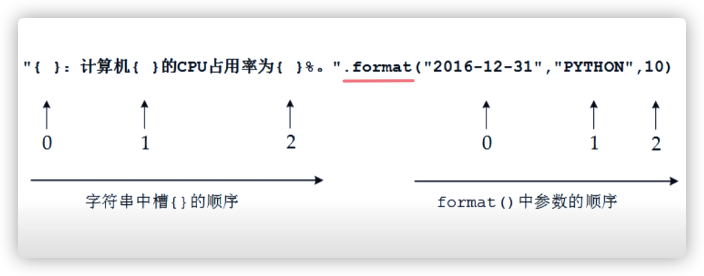

In [135]:
add_pic('format_function.png')

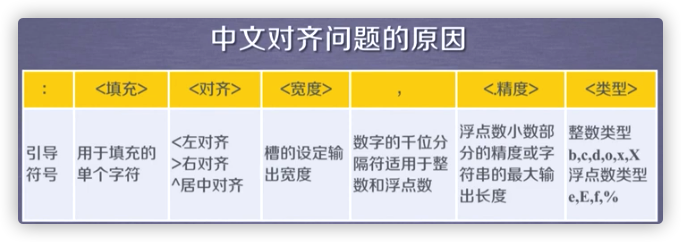

In [136]:
add_pic('format_function2.png')

4.再定义一个主函数 def main()统筹运行

In [142]:
def main(): # 主程序
    url = 'http://www.zuihaodaxue.cn/zuihaodaxuepaiming2019.html'
    html = getHTMLText(url)
    fillUnivList(ulist, html)
    printUnivList(ulist, 20) # 打印前20的学校信息
main()  # 依次运行主程序中所有的函数


    排名    	    校名    	    省份    	    总分    
    1     	   清华大学   	    北京    	   94.6   
    2     	   北京大学   	    北京    	   76.5   
    3     	   浙江大学   	    浙江    	   72.9   
    4     	  上海交通大学  	    上海    	   72.1   
    5     	   复旦大学   	    上海    	   65.6   
    6     	 中国科学技术大学 	    安徽    	   60.9   
    7     	  华中科技大学  	    湖北    	   58.9   
    7     	   南京大学   	    江苏    	   58.9   
    9     	   中山大学   	    广东    	   58.2   
    10    	 哈尔滨工业大学  	   黑龙江    	   56.7   
    11    	 北京航空航天大学 	    北京    	   56.3   
    12    	   武汉大学   	    湖北    	   56.2   
    13    	   同济大学   	    上海    	   55.7   
    14    	  西安交通大学  	    陕西    	   55.0   
    15    	   四川大学   	    四川    	   54.4   
    16    	  北京理工大学  	    北京    	   54.0   
    17    	   东南大学   	    江苏    	   53.6   
    18    	   南开大学   	    天津    	   52.8   
    19    	   天津大学   	    天津    	   52.3   
    20    	  华南理工大学  	    广东    	   52.0   


##### 以上，函数中套函数，这是我第一次这么使用。

In [144]:
rr = requests.get('https://www.topuniversities.com/student-info/choosing-university/worlds-top-100-universities')
rr.status_code

200

In [148]:
import webbrowser
webbrowser.open('https://www.topuniversities.com/robots', new = 2)

True

In [150]:
soup_rr = rr.text

In [152]:
soup_rr = BeautifulSoup(soup_rr, 'html.parser')

In [162]:
soup_rr.tbody.tr.div.string

'Rank'

In [184]:
soup_rr.find_all('div', 'para')

[<div class="para"><strong>Rank</strong></div>,
 <div class="para"><strong>University</strong></div>,
 <div class="para"><strong>Location</strong></div>,
 <div class="para">  1 </div>,
 <div class="para"><a href="https://www.topuniversities.com/universities/massachusetts-institute-technology-mit">Massachusetts Institute of Technology (MIT)</a></div>,
 <div class="para"><a href="https://www.topuniversities.com/where-to-study/north-america/united-states/guide">United States</a></div>,
 <div class="para">  2 </div>,
 <div class="para"><a href="https://www.topuniversities.com/universities/stanford-university">Stanford University</a></div>,
 <div class="para">United States</div>,
 <div class="para">  3 </div>,
 <div class="para"><a href="https://www.topuniversities.com/universities/harvard-university">Harvard University</a></div>,
 <div class="para">United States</div>,
 <div class="para">  4 </div>,
 <div class="para"><a href="https://www.topuniversities.com/universities/california-institu

In [187]:
rankings = []
for td in soup_rr.find_all('div', 'para'):
    print(type(td.string))

<class 'bs4.element.NavigableString'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.NavigableString'>
<class 'bs4.

In [188]:
rankings = []
for td in soup_rr.find_all('div', 'para'):
    print(td.string)

Rank
University
Location
  1 
Massachusetts Institute of Technology (MIT)
United States
  2 
Stanford University
United States
  3 
Harvard University
United States
  4 
California Institute of Technology (Caltech)
United States
  5 
University of Oxford
United Kingdom
  6 
ETH Zurich (Swiss Federal Institute of Technology)
 
Switzerland
 
  7 
University of Cambridge
United Kingdom
  8 
Imperial College London
United Kingdom
  9 
University of Chicago
United States
  10 
UCL (University College London)
United Kingdom
  11 
National University of Singapore (NUS)
Singapore
  12 
Princeton University
United States
  13 
Nanyang Technological University, Singapore (NTU)
Singapore
  14 
Ecole Polytechnique Fédérale de Lausanne (EPFL)
Switzerland
  15 
Tsinghua University
China
  16 
University of Pennsylvania
United States
  18 
Yale University
United States
  17 
Cornell University
United States
  19 
Columbia University
United States
  20 
University of Edinburgh
United Kingdom
  21 
Uni

In [205]:
rankings = []
for td in soup_rr.find_all('div', 'para'):
    if isinstance(td, bs4.element.NavigableString):
        tds = td.string
        rankings.append(tds[0])
print(rankings)

[]


In [212]:
for td in soup_rr.find_all('div', 'para'):
    rankings.append(list(td.string))

In [213]:
for word in rankings:
    

[['R', 'a', 'n', 'k'],
 ['U', 'n', 'i', 'v', 'e', 'r', 's', 'i', 't', 'y'],
 ['L', 'o', 'c', 'a', 't', 'i', 'o', 'n'],
 ['\xa0', ' ', '1', '\xa0'],
 ['M',
  'a',
  's',
  's',
  'a',
  'c',
  'h',
  'u',
  's',
  'e',
  't',
  't',
  's',
  ' ',
  'I',
  'n',
  's',
  't',
  'i',
  't',
  'u',
  't',
  'e',
  ' ',
  'o',
  'f',
  ' ',
  'T',
  'e',
  'c',
  'h',
  'n',
  'o',
  'l',
  'o',
  'g',
  'y',
  ' ',
  '(',
  'M',
  'I',
  'T',
  ')'],
 ['U', 'n', 'i', 't', 'e', 'd', ' ', 'S', 't', 'a', 't', 'e', 's'],
 ['\xa0', ' ', '2', '\xa0'],
 ['S',
  't',
  'a',
  'n',
  'f',
  'o',
  'r',
  'd',
  ' ',
  'U',
  'n',
  'i',
  'v',
  'e',
  'r',
  's',
  'i',
  't',
  'y'],
 ['U', 'n', 'i', 't', 'e', 'd', ' ', 'S', 't', 'a', 't', 'e', 's'],
 ['\xa0', ' ', '3', '\xa0'],
 ['H',
  'a',
  'r',
  'v',
  'a',
  'r',
  'd',
  ' ',
  'U',
  'n',
  'i',
  'v',
  'e',
  'r',
  's',
  'i',
  't',
  'y'],
 ['U', 'n', 'i', 't', 'e', 'd', ' ', 'S', 't', 'a', 't', 'e', 's'],
 ['\xa0', ' ', '4', '\xa0']